In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# librosa is a Python library for analyzing audio and music.
# It can be used to extract the data from the audio files we will see it later
import librosa 
import librosa.display

# to play the audio files
from IPython.display import Audio
plt.style.use('seaborn-white')

In [2]:
################################
#WE CREATE THE BIG DATASET FIRST
################################
#uncomment when data preprocessing is done
#used to check for already processed data to save time
DATA_FRAMES = True
fem_path = '/content/drive/MyDrive/CMPS 287/Female_features.csv'
mal_path = '/content/drive/MyDrive/CMPS 287/Male_features.csv'

In [3]:
TESS = "/content/drive/MyDrive/Kaggle/TESS Toronto emotional speech set data"
RAV = "/content/drive/MyDrive/Kaggle/audio_speech_actors_01-24(RAVDESS)"
SAVEE = "/content/drive/MyDrive/Kaggle/AudioData(SAVEE)"
CREMA = "/content/drive/MyDrive/Kaggle/AudioWAV(CREMA-D)"

In [4]:
# Get the data location for SAVEE
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
for j in dir_list:
  newPath = "/content/drive/MyDrive/Kaggle/AudioData(SAVEE)/" + j
  new_dir_list = os.listdir(newPath)
  emotion=[]
  path = []
  for i in new_dir_list:
    if i[-7:-6]=='a':
        emotion.append('angry')
    elif i[-7:-6]=='d':
        emotion.append('disgust')
    elif i[-7:-6]=='f':
        emotion.append('fear')
    elif i[-7:-6]=='h':
        emotion.append('happy')
    elif i[-7:-6]=='n':
        emotion.append('neutral')
    elif i[-8:-6]=='sa':
        emotion.append('sad')
    elif i[-8:-6]=='su':
        emotion.append('surprise')
    else:
        emotion.append('unknown') 
    path.append(SAVEE + '/' + j + '/' + i)

# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
print('SAVEE dataset')
SAVEE_df.head()

SAVEE dataset


,labels,path
0,angry,/content/drive/MyDrive/Kaggle/AudioData(SAVEE)...
1,angry,/content/drive/MyDrive/Kaggle/AudioData(SAVEE)...
2,angry,/content/drive/MyDrive/Kaggle/AudioData(SAVEE)...
3,angry,/content/drive/MyDrive/Kaggle/AudioData(SAVEE)...
4,angry,/content/drive/MyDrive/Kaggle/AudioData(SAVEE)...


In [5]:
# Get the data location for TESS
path = []
emotion = []
dir_list = os.listdir(TESS)

for i in dir_list:
    fname = os.listdir(TESS + "/" + i)   
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + "/" + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
#TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
print('TESS dataset')
TESS_df.head()

TESS dataset


,labels,path
0,fear,/content/drive/MyDrive/Kaggle/TESS Toronto emo...
1,fear,/content/drive/MyDrive/Kaggle/TESS Toronto emo...
2,fear,/content/drive/MyDrive/Kaggle/TESS Toronto emo...
3,fear,/content/drive/MyDrive/Kaggle/TESS Toronto emo...
4,fear,/content/drive/MyDrive/Kaggle/TESS Toronto emo...


In [6]:
# Importing datas from RAVDESS
dir = os.listdir(RAV)

males = []
females = [] 
        
for actor in dir:
       
    files = os.listdir(RAV + "/" + actor)
        
    for file in files: 
        part = file.split('.')[0]
        part = part.split("-")           
            
        temp = int(part[6])        
                
        if part[2] == '01':
            emotion = 'neutral'
        elif part[2] == '02':
            emotion = 'calm'
        elif part[2] == '03':
            emotion = 'happy'
        elif part[2] == '04':
            emotion = 'sad'
        elif part[2] == '05':
            emotion = 'angry'
        elif part[2] == '06':
            emotion = 'fear'
        elif part[2] == '07':
            emotion = 'disgust'
        elif part[2] == '08':
            emotion = 'surprise'
        else:
            emotion = 'unknown'
            
        if temp%2 == 0:
            path = (RAV + '/' + actor + '/' + file)
            #emotion = 'female_'+emotion
            females.append([emotion, path]) 
        else:
            path = (RAV + '/' + actor + '/' + file)
             #emotion = 'male_'+emotion
            males.append([emotion, path])   
    
   
RavFemales_df = pd.DataFrame(females)
RavFemales_df.columns = ['labels', 'path']

RavMales_df = pd.DataFrame(males)
RavMales_df.columns = ['labels', 'path']

print('RAVDESS datasets')
RavFemales_df.head()

RAVDESS datasets


,labels,path
0,neutral,/content/drive/MyDrive/Kaggle/audio_speech_act...
1,neutral,/content/drive/MyDrive/Kaggle/audio_speech_act...
2,neutral,/content/drive/MyDrive/Kaggle/audio_speech_act...
3,neutral,/content/drive/MyDrive/Kaggle/audio_speech_act...
4,calm,/content/drive/MyDrive/Kaggle/audio_speech_act...


In [7]:
RavMales_df.head()

,labels,path
0,neutral,/content/drive/MyDrive/Kaggle/audio_speech_act...
1,neutral,/content/drive/MyDrive/Kaggle/audio_speech_act...
2,neutral,/content/drive/MyDrive/Kaggle/audio_speech_act...
3,neutral,/content/drive/MyDrive/Kaggle/audio_speech_act...
4,calm,/content/drive/MyDrive/Kaggle/audio_speech_act...


In [8]:
# Importing datas from CREMA
files = os.listdir(CREMA)

female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]
males = []
females = []

for file in files: 
    part = file.split('_')   
    
    if part[2] == 'SAD':
        emotion = 'sad'
    elif part[2] == 'ANG':
        emotion = 'angry'
    elif part[2] == 'DIS':
        emotion = 'disgust'
    elif part[2] == 'FEA':
        emotion = 'fear'
    elif part[2] == 'HAP':
        emotion = 'happy'
    elif part[2] == 'NEU':
        emotion = 'neutral'  
    else:
        emotion = 'unknown'
        
    if int(part[0]) in female:
        path = (CREMA + '/' + file)
        #emotion = 'female_'+emotion
        females.append([emotion, path]) 
    else:
        path = (CREMA + '/' + file)
        #emotion = 'male_'+emotion
        males.append([emotion, path])   
    
CremaFemales_df = pd.DataFrame(females)
CremaFemales_df.columns = ['labels', 'path']

CremaMales_df = pd.DataFrame(males)
CremaMales_df.columns = ['labels', 'path']
    
print('CREMA datasets')
CremaFemales_df.head()

CREMA datasets


,labels,path
0,fear,/content/drive/MyDrive/Kaggle/AudioWAV(CREMA-D...
1,happy,/content/drive/MyDrive/Kaggle/AudioWAV(CREMA-D...
2,neutral,/content/drive/MyDrive/Kaggle/AudioWAV(CREMA-D...
3,angry,/content/drive/MyDrive/Kaggle/AudioWAV(CREMA-D...
4,sad,/content/drive/MyDrive/Kaggle/AudioWAV(CREMA-D...


In [9]:
CremaMales_df.head()

,labels,path
0,angry,/content/drive/MyDrive/Kaggle/AudioWAV(CREMA-D...
1,disgust,/content/drive/MyDrive/Kaggle/AudioWAV(CREMA-D...
2,fear,/content/drive/MyDrive/Kaggle/AudioWAV(CREMA-D...
3,happy,/content/drive/MyDrive/Kaggle/AudioWAV(CREMA-D...
4,neutral,/content/drive/MyDrive/Kaggle/AudioWAV(CREMA-D...


In [10]:
# Now lets merge all the dataframe
Males = pd.concat([SAVEE_df, RavMales_df, CremaMales_df], axis = 0)
Males.to_csv("males_emotions_df.csv", index = False)

Females = pd.concat([TESS_df, RavFemales_df, CremaFemales_df], axis = 0)
Females.to_csv("females_emotions_df.csv", index = False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


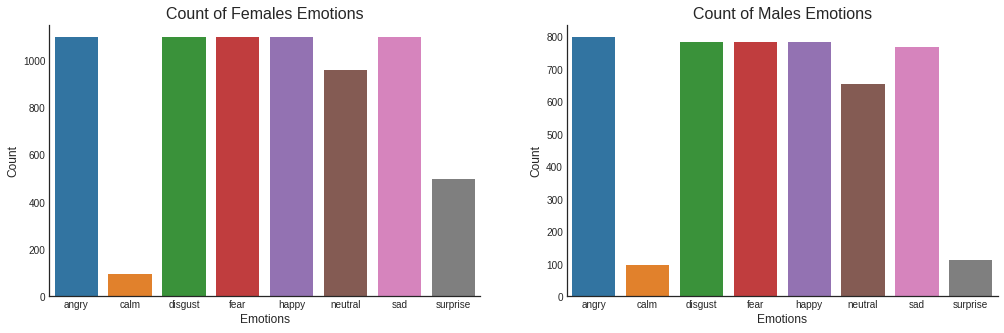

In [11]:
###################
#DATA VISUALIZATION
###################
order = ['angry','calm','disgust','fear','happy','neutral','sad','surprise']

fig = plt.figure(figsize=(17, 5))

fig.add_subplot(121)
plt.title('Count of Females Emotions', size=16)
sns.countplot(Females.labels, order = order)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)

fig.add_subplot(122)
plt.title('Count of Males Emotions', size=16)
sns.countplot(Males.labels, order = order)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)

plt.show()

In [12]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {e} emotion', size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

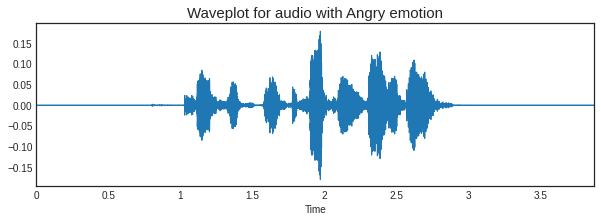

In [13]:
emotion='Angry'
path = '/content/drive/MyDrive/Kaggle/audio_speech_actors_01-24(RAVDESS)/Actor_01/03-01-05-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

In [14]:
##################
#DATA AUGMENTATION
##################
def noise(data):
    noise_amp = 0.04*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.70):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.8):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

def higher_speed(data, speed_factor = 1.25):
    return librosa.effects.time_stretch(data, speed_factor)

def lower_speed(data, speed_factor = 0.75):
    return librosa.effects.time_stretch(data, speed_factor)

# taking any example and checking for techniques.
path = path = '/content/drive/MyDrive/Kaggle/audio_speech_actors_01-24(RAVDESS)/Actor_01/03-01-05-01-01-01-01.wav'
data, sample_rate = librosa.load(path)

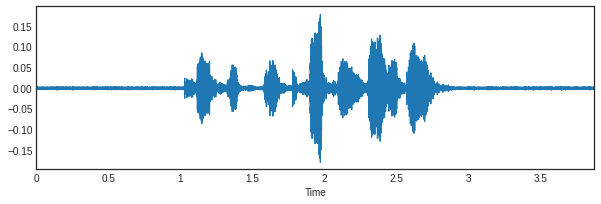

In [15]:
plt.figure(figsize=(10,3))
x = noise(data)
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

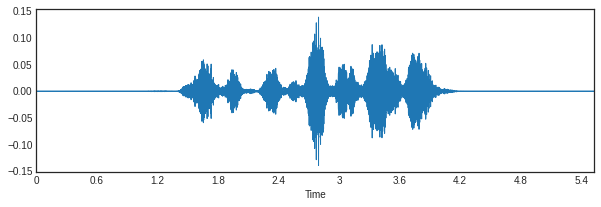

In [16]:
plt.figure(figsize=(10,3))
x = stretch(data)
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

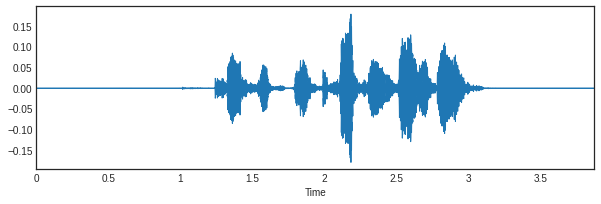

In [17]:
plt.figure(figsize=(10,3))
x = shift(data)
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

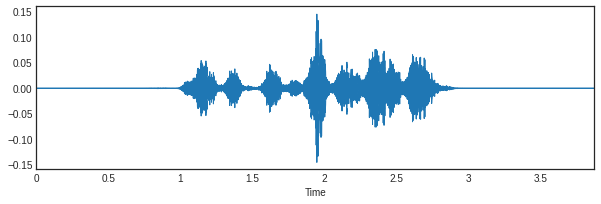

In [18]:
plt.figure(figsize=(10,3))
x = pitch(data, sample_rate)
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

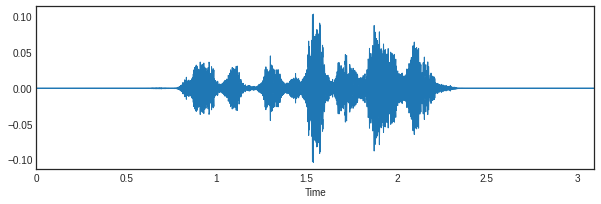

In [19]:
plt.figure(figsize=(10,3))
x = higher_speed(data)
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

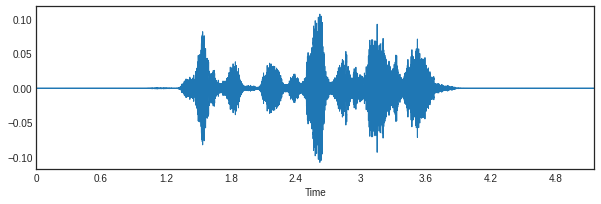

In [20]:
plt.figure(figsize=(10,3))
x = lower_speed(data)
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [21]:
################################################################
#FEATURE EXTRACTION (Mel Frequency Cepstral Coefficents (MFCCs))
################################################################
#sample_rate = 22050

def extract_features(data):
    
    result = np.array([])
    
    #mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=42) #42 mfcc so we get frames of ~60 ms
    mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=58)
    mfccs_processed = np.mean(mfccs.T,axis=0)
    result = np.array(mfccs_processed)
     
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=3, offset=0.5, res_type='kaiser_fast') 
    
    #without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    #noised
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    #stretched
    stretch_data = stretch(data)
    res3 = extract_features(stretch_data)
    result = np.vstack((result, res3))
    
    #shifted
    shift_data = shift(data)
    res4 = extract_features(shift_data)
    result = np.vstack((result, res4))
    
    #pitched
    pitch_data = pitch(data, sample_rate)
    res5 = extract_features(pitch_data)
    result = np.vstack((result, res5)) 
    
    #speed up
    higher_speed_data = higher_speed(data)
    res6 = extract_features(higher_speed_data)
    result = np.vstack((result, res6))
    
    #speed down
    lower_speed_data = higher_speed(data)
    res7 = extract_features(lower_speed_data)
    result = np.vstack((result, res7))
    
    return result

In [22]:
if not DATA_FRAMES:
    
    female_X, female_Y = [], []
    for path, emotion in zip(Females.path, Females.labels):
        features = get_features(path)
        #adding augmentation, get_features return a multi dimensional array (for each augmentation), so we have to use a loop to fill the df
        for elem in features: 
            female_X.append(elem)        
            female_Y.append(emotion)
    

    male_X, male_Y = [], []
    for path, emotion in zip(Males.path, Males.labels):
        features = get_features(path)
        for elem in features:
            male_X.append(elem)
            male_Y.append(emotion)
            
    print(f'Check shapes:\nFemale features: {len(female_X)}, labels: {len(female_Y)}\nMale features:   {len(male_X)}, labels: {len(male_Y)}')

Check shapes:
Female features: 49224, labels: 49224
Male features:   33390, labels: 33390


In [23]:
def setup_dataframe(gender, features, labels):
    df = pd.DataFrame(features)
    df['labels'] = labels
    df.to_csv(f'/content/drive/MyDrive/CMPS 287/{gender}_features.csv', index=False)
    
    print(f'{gender} dataframe')
    df.sample(frac=1).head()
    
    return df

In [24]:
if not DATA_FRAMES:
    Females_Features = setup_dataframe('Female', female_X, female_Y)
else:
    Females_Features = pd.read_csv(fem_path)

Female dataframe


In [25]:
if not DATA_FRAMES:
    Males_Features = setup_dataframe('Male', male_X, male_Y)
else:
    Males_Features = pd.read_csv(mal_path)

Male dataframe
